In [10]:
import settings
import tweepy
import argparse
import time

import pandas as pd

import get_tweets

import re
import os

import MeCab

from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn import ensemble

import gensim


In [3]:
df = pd.read_csv('../data/ki_oku/tweet_user_kizuna_100k.csv')

In [4]:
def text_wakati(text):
    m = MeCab.Tagger('-Owakati -d /usr/local/lib/mecab/dic/mecab-ipadic-neologd ')
    wa = m.parse(text)
    wa = wa.split(' ')
    return wa

In [5]:
df_kizuna = df[:1000]

In [6]:
df_kizuna['wakati'] = df_kizuna['text'].apply(text_wakati)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
df_kizuna

,Unnamed: 0,user,text,wakati
0,0,serugei_anime,@midnight_toyosu お疲れ様でした！！ @FA_010S 万能機…？🤔🤔 @F...,"[@, midnight, _, toyosu, お疲れ様, でし, た, ！, ！, @,..."
1,1,Akuma25Ren,@kousuke_syma キモオタが出来上がる理由が分かったよ…コミ障でうまく喋れないんだ...,"[@, kousuke, _, syma, キモオタ, が, 出来上がる, 理由, が, 分..."
2,2,coil_ganguboy,RT @ARuFa_FARu: チョコシリアルの終盤に飲む「チョコ味の牛乳」が大好きなので、...,"[RT, @, ARuFa, _, FARu, :, チョコ, シリアル, の, 終盤, に..."
3,3,dkndkndkndkn,テイルズオブジアビスに出てきたインディグネイションもエドワード・D・モリスン時代から受け継が...,"[テイルズオブジアビス, に, 出, て, き, た, インディグネイション, も, エドワ..."
4,4,nqk13044,@DrD19688276 ちなみに年代的にはどれ位の作品なんです？車がどことなくレトロな感じ...,"[@, DrD, 19688276, ちなみに, 年代, 的, に, は, どれ, 位, の..."
5,5,Gintoki_kai2,RT @OHAYO_chihaya: ベンチに座っていたらヤンキーにいきなり喧嘩を売られ、ボ...,"[RT, @, OHAYO, _, chihaya, :, ベンチ, に, 座っ, て, い..."
6,6,_______NOI_____,RT @takanonnotakano: 結婚式の招待状が届いたけど何もかも知らない女のマン...,"[RT, @, takanonnotakano, :, 結婚式, の, 招待, 状, が, ..."
7,7,otsukimimoon,RT @tortor_08: そうめんに異様な執着をみせるねこ😳 https://t.co/...,"[RT, @, tortor, _, 08, :, そうめん, に, 異様, な, 執着, ..."
8,8,garfunkel_s,RT @yontengoP: なので結論としては、中の人とコンテンツが不可分ってなると、命運...,"[RT, @, yontengoP, :, なので, 結論, として, は, 、, 中の人,..."
9,9,___hrks,RT @y_yujirushi: あれは！キズナアイの中でも最も残虐な人格…カズヤ！！ ht...,"[RT, @, y, _, yujirushi, :, あれ, は, ！, キズナアイ, の..."


In [33]:
def vec2dense(vec, num_terms):
    return list(gensim.matutils.corpus2dense([vec], num_terms=num_terms).T[0])

def bagofwords_dct(docs):
    '''
    １文書が単語のリストになった文書群のリスト
    '''
    stopword=['キズナアイ','奥川くん']
    docs = [d for d in docs if d not in  stopword]
    
    dct = gensim.corpora.Dictionary(docs)
    unfiltered = dct.token2id.keys()
    # 出現頻度　３未満の単語消す
    # 出現率が0.9以上の単語を消す
    #dct.filter_extremes(no_below=5, no_above=0.9)
    dct.filter_extremes(no_below=400, no_above=0.6)
    filtered = dct.token2id.keys()
    filtered_out = set(unfiltered) - set(filtered)
    print(len(filtered))
    print(len(filtered_out))
    return dct

In [34]:
kizuna_dict = bagofwords_dct(df_kizuna['wakati'].to_list())

328
249474


In [12]:
kizuna_dict.filter_tokens('キズナアイ')

In [13]:
len(kizuna_dict)

328

In [67]:
kizuna_dict.dfs

{167: 276,
 88: 496,
 528: 201,
 685: 299,
 200: 249,
 628: 285,
 157: 272,
 634: 161,
 130: 277,
 664: 716,
 240: 426,
 672: 648,
 608: 217,
 547: 319,
 160: 365,
 279: 108,
 679: 155,
 158: 397,
 267: 566,
 182: 373,
 298: 145,
 378: 682,
 578: 151,
 650: 293,
 502: 691,
 331: 330,
 326: 141,
 123: 691,
 347: 315,
 397: 291,
 37: 132,
 46: 107,
 52: 205,
 563: 136,
 263: 440,
 334: 212,
 26: 178,
 544: 119,
 618: 310,
 534: 135,
 403: 759,
 400: 478,
 355: 137,
 492: 445,
 593: 239,
 461: 258,
 570: 183,
 546: 120,
 363: 524,
 90: 509,
 565: 187,
 183: 797,
 117: 760,
 521: 649,
 635: 234,
 277: 275,
 552: 353,
 614: 384,
 535: 382,
 27: 232,
 13: 619,
 185: 307,
 15: 446,
 55: 280,
 128: 155,
 562: 183,
 665: 531,
 87: 591,
 616: 233,
 452: 181,
 571: 450,
 411: 167,
 136: 435,
 431: 156,
 622: 455,
 489: 674,
 135: 103,
 164: 546,
 237: 224,
 619: 171,
 149: 134,
 213: 791,
 670: 174,
 600: 247,
 463: 360,
 434: 376,
 214: 661,
 220: 335,
 233: 629,
 491: 177,
 582: 386,
 359: 190,

In [15]:
df_okugawa = pd.read_csv('../data/ki_oku/tweet_user_okugawa_10k.csv')

In [81]:
df_okugawa = df_okugawa[:1000]

In [35]:
df_okugawa['wakati'] = df_okugawa['text'].apply(text_wakati)

In [36]:
kioku_dict = bagofwords_dct(df_kizuna['wakati'].to_list()+df_okugawa['wakati'].to_list())

1400
426603


In [39]:
kioku_dict.filter_tokens(bad_ids=[168,1383])

In [40]:
len(kioku_dict)

1398

In [37]:
kioku_dict.token2id['キズナアイ']

168

In [38]:
kioku_dict.token2id['奥川']

1383

In [169]:
kioku_dict.token2id['く']

86

In [21]:
kioku_dict = bagofwords_dct(df_kizuna['wakati'].to_list()+df_okugawa['wakati'].to_list())

1400
426603


In [43]:
def text2bow(text,dct):
    docs_bow = dct.doc2bow(text)
    return vec2dense(dct.doc2bow(text),1398)

In [44]:
df_kizuna['bow'] = df_kizuna['wakati'].apply(text2bow,dct=kioku_dict)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
df_okugawa['bow'] = df_okugawa['wakati'].apply(text2bow,dct=kioku_dict)

In [77]:
df_kizuna['label'] = 'kizuna'

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
df_okugawa['label'] = 'okuga'

In [84]:
df_kizuna['label'] = 0
df_okugawa['label'] = 1

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
df_kioku = pd.concat([df_kizuna,df_okugawa])

In [49]:
def make_data(df):
    all_data = df['bow'].to_list()
    all_target = df['label'].to_list()
    

    train_data, test_data, train_target, test_target = train_test_split(all_data,all_target ,test_size=0.2,random_state=256)
    #train_data, test_data, train_target, test_target, train_index , test_index = train_test_split(all_data,all_target ,all_index,test_size=0.2,random_state=256)
    /
    return train_data, test_data, train_target, test_target

In [86]:
train_data, test_data, train_target, test_target = make_data(df_kioku)

In [52]:
def train(train_data, test_data, train_target, test_target):
    print("traindata: "+ str(len(train_data)))
    print("testdata: "+ str(len(test_data))) 

    # train
    model = ensemble.RandomForestClassifier(random_state=256,)
    model.fit(train_data,train_target)
    print(model.score(train_data,train_target))    
    print(model.score(test_data,test_target))
    
    return model

In [195]:
model = train(train_data, test_data, train_target, test_target)

traindata: 1600
testdata: 400
0.99375


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8725


In [53]:
model_ = train(train_data, test_data, train_target, test_target)

traindata: 1918
testdata: 480


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9958289885297185
0.88125


### 決定木の可視化

In [112]:
from sklearn.datasets import load_iris
from sklearn import tree

model_tree = tree.DecisionTreeClassifier(max_depth=10) 
#model_tree.fit(train_data,train_target
model_tree.fit(np.array(train_data),np.array(train_target))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [68]:
import pydotplus
from IPython.display import Image
from graphviz import Digraph

dot_data = tree.export_graphviz(
    model_tree,
    out_file=None,
    feature_names= list(kioku_dict.token2id.keys()),
    filled=True,
    proportion=True)



graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
graph.write_png('../data/ki_oku/model_tree_2.png')

True

/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 26397 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 26397 missing from current font.
  glyph = font.load_char(ccode, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 26397 missing from current font.
  font.load_char(ord(s), flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 27508 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 21490 missing from current font.
  font.set_text(s, 0.0,

/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 33609 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 33609 missing from current font.
  glyph = font.load_char(ccode, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 33609 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 33609 missing from current font.
  font.load_char(ord(s), flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 12424 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 12429 missing from current font.
  font.set_text(s, 0.0,

/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 25237 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 25163 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 25237 missing from current font.
  glyph = font.load_char(ccode, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 25163 missing from current font.
  glyph = font.load_char(ccode, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25237 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25163 missing from current font.
  fon

/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 65311 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 65311 missing from current font.
  glyph = font.load_char(ccode, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 65311 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 65311 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 27671 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 27671 missing from current font.
  glyph = font.load_char(

/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 12376 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 12376 missing from current font.
  glyph = font.load_char(ccode, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 12376 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 26041 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 27861 missing from current font.
  font.set_text(s, 0.0, fl

/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 128079 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 128079 missing from current font.
  glyph = font.load_char(ccode, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128079 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 128079 missing from current font.
  font.load_char(ord(s), flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 12450 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 12450 missing from current font.
  glyph = font.loa

/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 12419 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 12419 missing from current font.
  glyph = font.load_char(ccode, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12419 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 12419 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 22890 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 19977 missing from current font.
  font.set_text(s, 0.0, fl

/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 12473 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 12510 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 12507 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 12473 missing from current font.
  glyph = font.load_char(ccode, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 12510 missing from current font.
  glyph = font.load_char(ccode, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 12507 missing from current font.
  glyph = font.load_

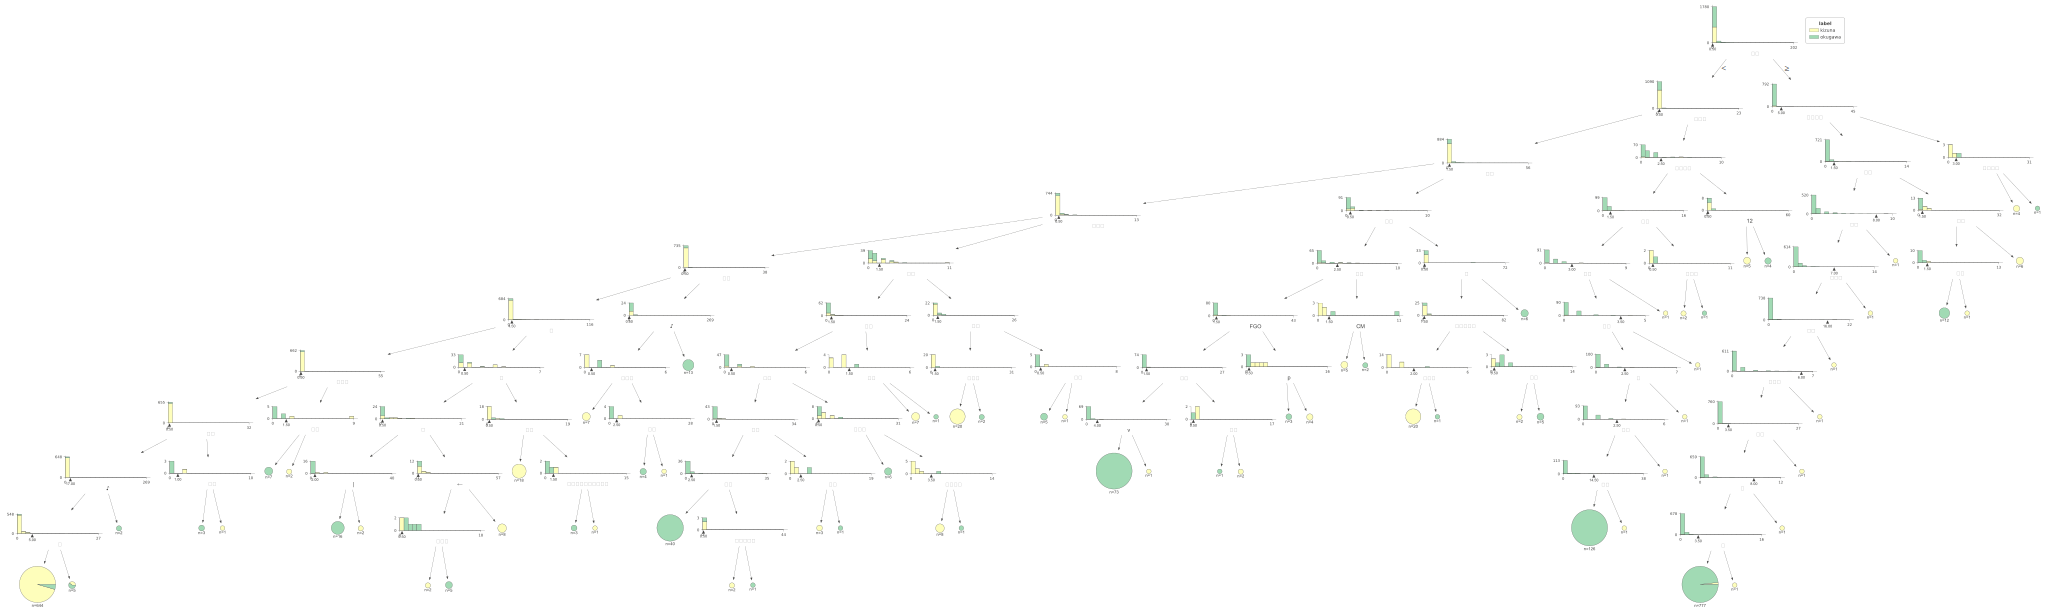

In [113]:
from dtreeviz.trees import dtreeviz
viz = dtreeviz(
    model_tree,
    np.array(train_data), 
    np.array(train_target),
    target_name='label',
    feature_names= list(kioku_dict.token2id.keys()),
    class_names=['kizuna','okugawa']
) 

viz

In [98]:
from sklearn.datasets import load_iris
from sklearn import tree
from dtreeviz.trees import dtreeviz

iris = load_iris()
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

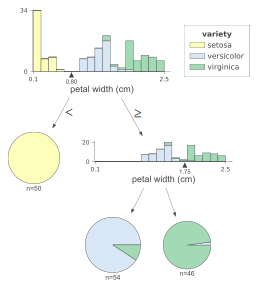

In [99]:
viz = dtreeviz(
    clf,
    iris.data, 
    iris.target,
    target_name='variety',
    feature_names=iris.feature_names,
    class_names=[str(i) for i in iris.target_names],
) 

viz

In [114]:
from dtreeviz.trees import dtreeviz
viz = dtreeviz(
    model_tree,
    train_data, 
    train_target,
    target_name='label',
    feature_names= list(kioku_dict.token2id.keys()),
    class_names=['kizuna','okugawa']
) 

viz

TypeError: list indices must be integers or slices, not tuple

In [100]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [111]:
np.array(train_data)

array([[0., 0., 2., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 4., 0., ..., 0., 0., 0.],
       [0., 7., 5., ..., 2., 1., 0.],
       [3., 0., 3., ..., 0., 0., 0.]], dtype=float32)

In [108]:
class_names=[str(i) for i in iris.target_names]
class_names

['setosa', 'versicolor', 'virginica']

In [110]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [117]:

from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth=2) 
model.fit(train_data,train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [119]:
train_data = np.array(train_data)
train_target = np.array(train_target)

/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 22890 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 19977 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 25391 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 22890 missing from current font.
  glyph = font.load_char(ccode, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 19977 missing from current font.
  glyph = font.load_char(ccode, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 25391 missing from current font.
  glyph = font.load_

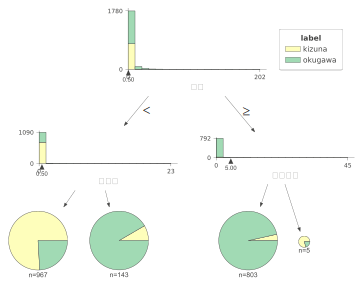

In [121]:
from dtreeviz.trees import dtreeviz
viz = dtreeviz(
    model,
    train_data, 
    train_target,
    target_name='label',
    feature_names= list(kioku_dict.token2id.keys()),
    class_names=['kizuna','okugawa']
) 

viz